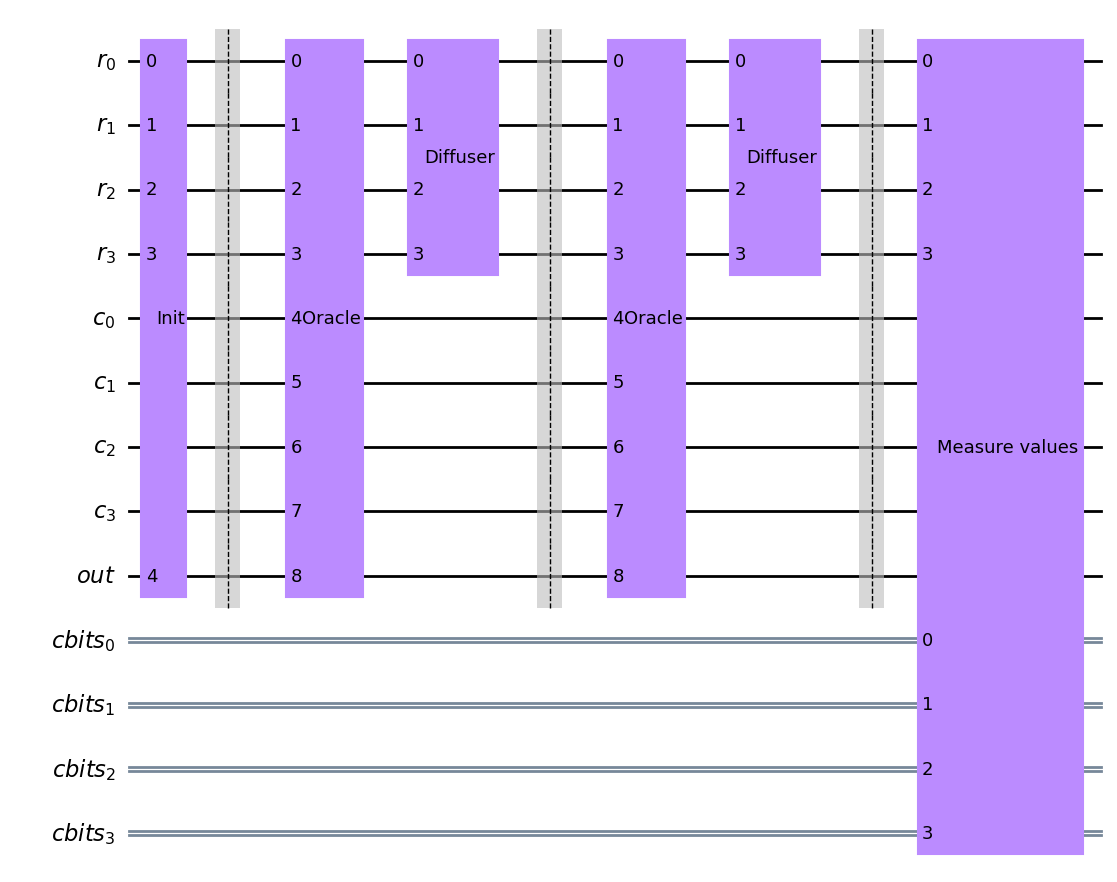

In [2]:
from qiskit_grover import QiskitGrover

grover = QiskitGrover()
grover.Build()
qc = grover.qc

# qc = grover.Oracle()

qc.draw(output="mpl")


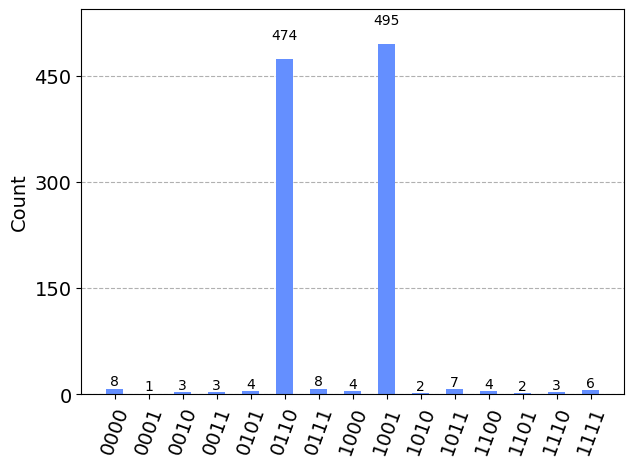

In [2]:
from qiskit import Aer, transpile
from qiskit.visualization import plot_histogram

# Simulate and plot results
aer_simulator = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(qc, aer_simulator)
result = aer_simulator.run(transpiled_qc).result()
plot_histogram(result.get_counts())